<a href="https://colab.research.google.com/github/dianakang/Stanford-CS224N/blob/master/Standford_CS224N_Lecture1_Introduction_and_Word_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture Plan

*   Lecture 1 : Introduction and Word Vectors
  *   1.1. Human language and word meaning
      *   1.1.1. How do we represent the meaning of a word? - Denotational semantics
      *   1.1.2. How do we have usable meaning in a computer? - WordNet
      *   1.1.3. One-hot vectors: Means one 1, the rest 0s
      *   1.1.4. Word vectors - Representing words by their context
  *   1.2. Word2vec introduction
  *   1.3. Word2vec objective function gradients
  *   1.4. Looking at word vectors

---

# 1. Introduction and Word Vectors

## 1.1. Human language and word meaning

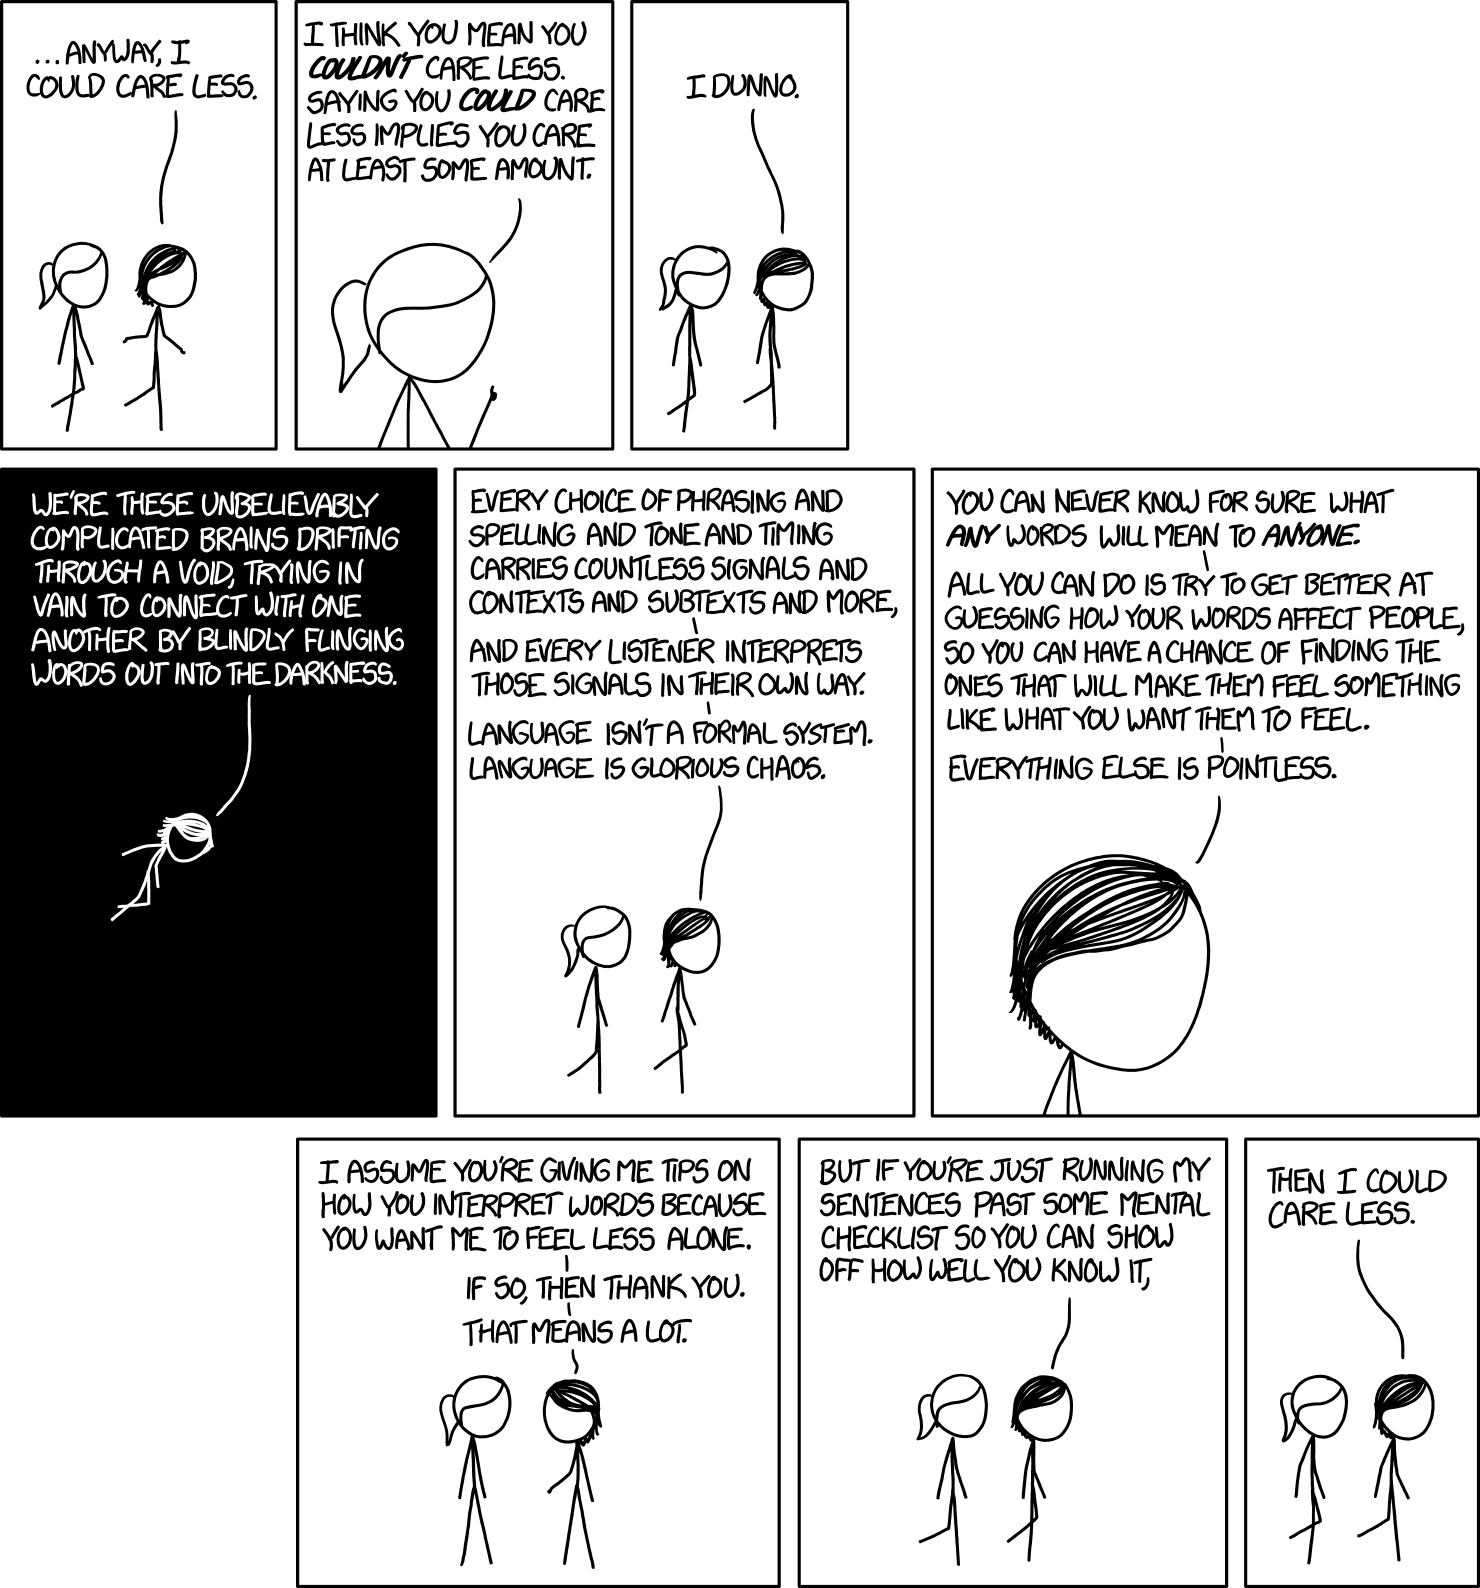
source: https://xkcd.com/1576/

-> We're doing some kind of a probabilistic inference of guessing what people mean. This is because we're using language not just for the information functions but for the social functions etc too.  

---



*   **What we want to do in this class in not solve the whole of language, but we want to represent the meaning of words.**

### 1.1.1. How do we represent the meaning of a word? - Denotational semantics









*   Definition of 'meaning' (Webster dictionary)

  *   the idea that is represented by a word, phrase, etc.
  *   the idea that a person wants to express by using words, signs, etc.
  *   the idea that is expressed in a work of writing, art, etc.



*   **Denotational semantics** = **signifier(symbol) <-> signified(idea or thing)** : Commonest linguistic way of thinking of meaning


      Definition - 'denotational semantics' (Wikipedia)
      : In computer science, denotational semantics (initially known as mathematical semantics or Scott–Strachey semantics) is 
      an approach of formalizing the meanings of programming languages by constructing mathematical objects (called denotations) 
      that describe the meanings of expressions from the languages.

---



### 1.1.2. How do we have usable meaning in a computer? - WordNet



*   How do we have **usable meaning in a computer**?

  Common solution: Use e.g. **WordNet**, a thesaurus containing lists of **synonym sets** and **hypernyms** ("is a" relationships).

*   What is a 'WordNet'?
    
    : It is an online thesaurus that has word meanings and relationships.


In [1]:
import nltk
nltk.download('wordnet')

# synonym sets containing "good":
from nltk.corpus import wordnet as wn
poses = {'n':'noun', 'v':'verb', 's':'adj (s)', 'a':'adj', 'r':'adv'}
for synset in wn.synsets("good"):
  print("{}: {}".format(poses[synset.pos()],
        ",".join([l.name() for l in synset.lemmas()])))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
noun: good
noun: good,goodness
noun: good,goodness
noun: commodity,trade_good,good
adj: good
adj (s): full,good
adj: good
adj (s): estimable,good,honorable,respectable
adj (s): beneficial,good
adj (s): good
adj (s): good,just,upright
adj (s): adept,expert,good,practiced,proficient,skillful,skilful
adj (s): good
adj (s): dear,good,near
adj (s): dependable,good,safe,secure
adj (s): good,right,ripe
adj (s): good,well
adj (s): effective,good,in_effect,in_force
adj (s): good
adj (s): good,serious
adj (s): good,sound
adj (s): good,salutary
adj (s): good,honest
adj (s): good,undecomposed,unspoiled,unspoilt
adj (s): good
adv: well,good
adv: thoroughly,soundly,good


In [2]:
# hypernyms of "pandas"

panda = wn.synset("panda.n.01")
hyper = lambda s: s.hypernyms()
list(panda.closure(hyper))

[Synset('procyonid.n.01'),
 Synset('carnivore.n.01'),
 Synset('placental.n.01'),
 Synset('mammal.n.01'),
 Synset('vertebrate.n.01'),
 Synset('chordate.n.01'),
 Synset('animal.n.01'),
 Synset('organism.n.01'),
 Synset('living_thing.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

* Problems with resources like **WordNet**
    *   Great as a resource but missing nuance
      *   e.g. "proficient" is listed as a synonym for "good".
          This is only correct in some contexts.

    *   Missing new meanings of words
      *   e.g. "wicked, badass, nifty, wizard, genius, ninja, bombest
      *   Impossible to keep-up-to-date!

    *   Subjective
    *   Requires human labor to create and adapt
    *   Can't compute accurate word similarity


---



### 1.1.3. One-hot vectors: Means one 1, the rest 0s



*   **One-hot vectors**

  : Means one 1, the rest 0s

        motel = [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
        hotel = [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
    Vector dimension = number of words in vocabulary (e.g., 500,000)

* **Problem with words as discrete symbols**

  Example: in web search, if user searches for "Seattle motel", we would like to match documents containing "Seattle hotel".

  But:         
        
        motel = [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
        hotel = [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

  These two vectors are **orthogonal**.
  There is no natural notion of **similarity** for one-hot vectors!

  Solution:
  * Could try to rely on WordNet's list of synonyms to get similarity?

    * But it is well-known to fail badly: incompleteness, etc.

  * **Instead: learn to encode similarity in the vectors themselves**

---


      

### 1.1.4. Word vectors - Representing words by their context


  *   **Distributional semantics**: A word's meaning is given by the words that frequently appear close-by

  *   When a word *w* appears in a text, its **context** is the set of words that appear nearby (within a fixed-size window).
  *   Use the many contexts of *w* to build up a representation of *w* 



  * **Word vectors**

    : we will build a dense vector for each word, chosen so that it is similar to vectors of words that appear in similar contexts

    _banking = [0.286, 0.792, -0.177, -0.107, 0.109, -0.542, 0.349, 0.271]_

    Note) word vectors are sometimes called word embeddings or word representations. They are a distributed representation.

## 1.2. Word2vec introduction



**Word2vec**(Mikolov et al. 2013)  is a framework for learning word vectors



*   Idea:

    * We have a large corpus of text  
    * Every word in a fixed vocabulary is represented by a **vector**
    * Go through each position *t* in the text, which has a center word *c* and context ("outside") words *o*  
    * Use the **similarity of the word vectors** for *c* and o to **calculate the probability** of *o* given *c* (or vice versa) 
    * **Keep adjusting the word vectors** to maximize this probability











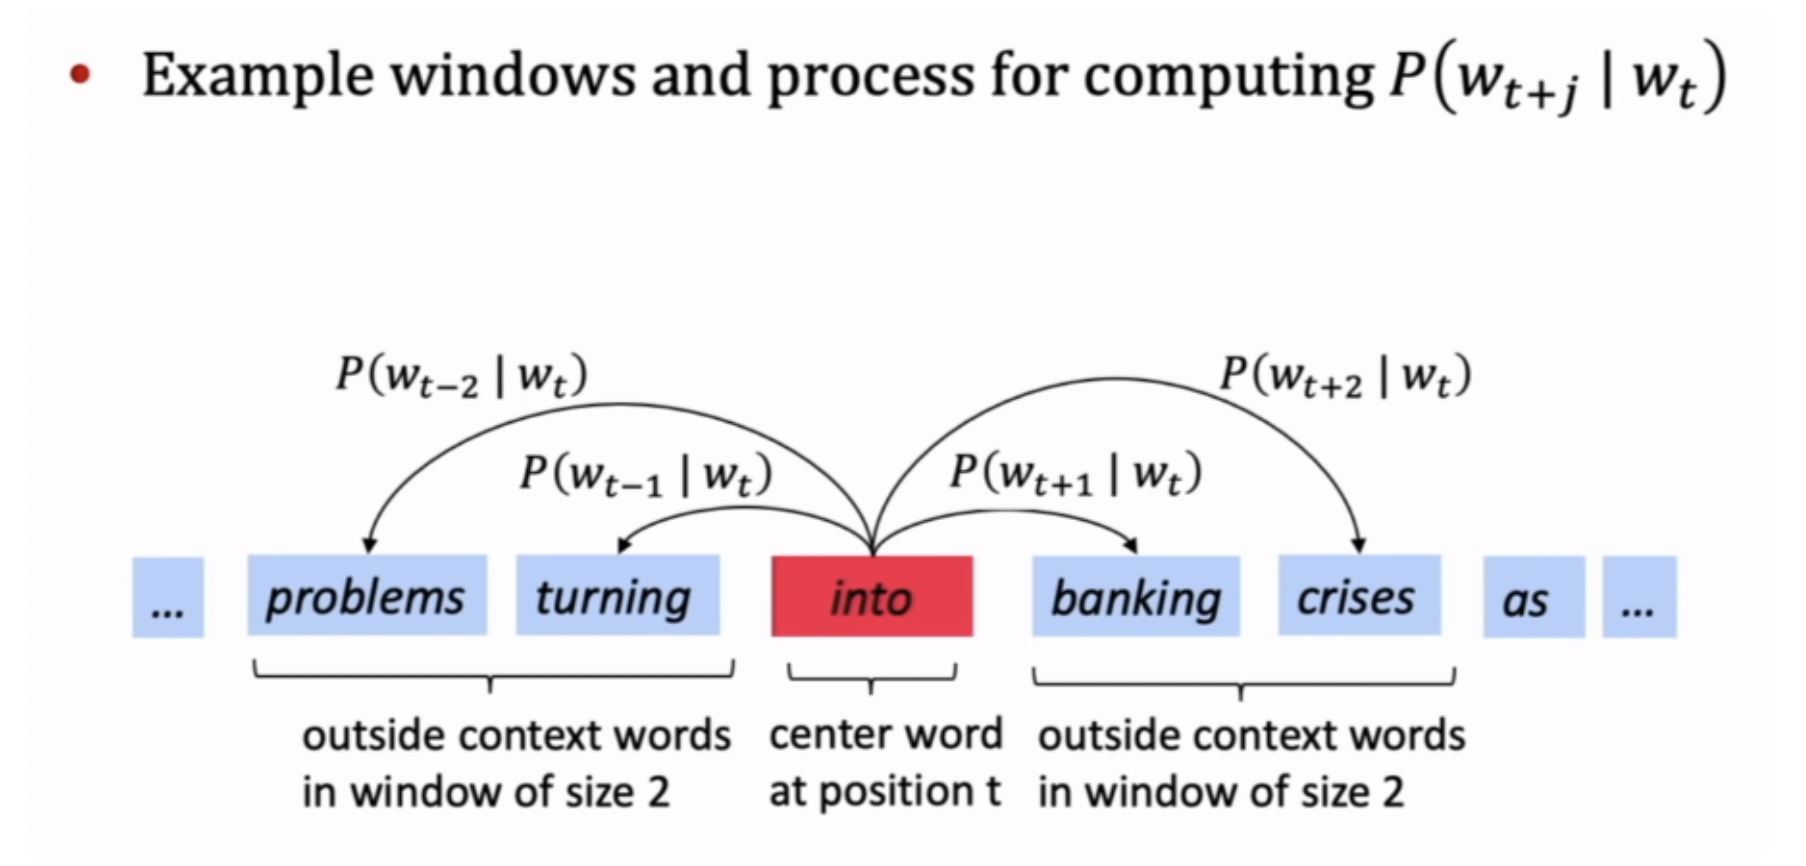

## 1.3. Word2vec objective function gradients

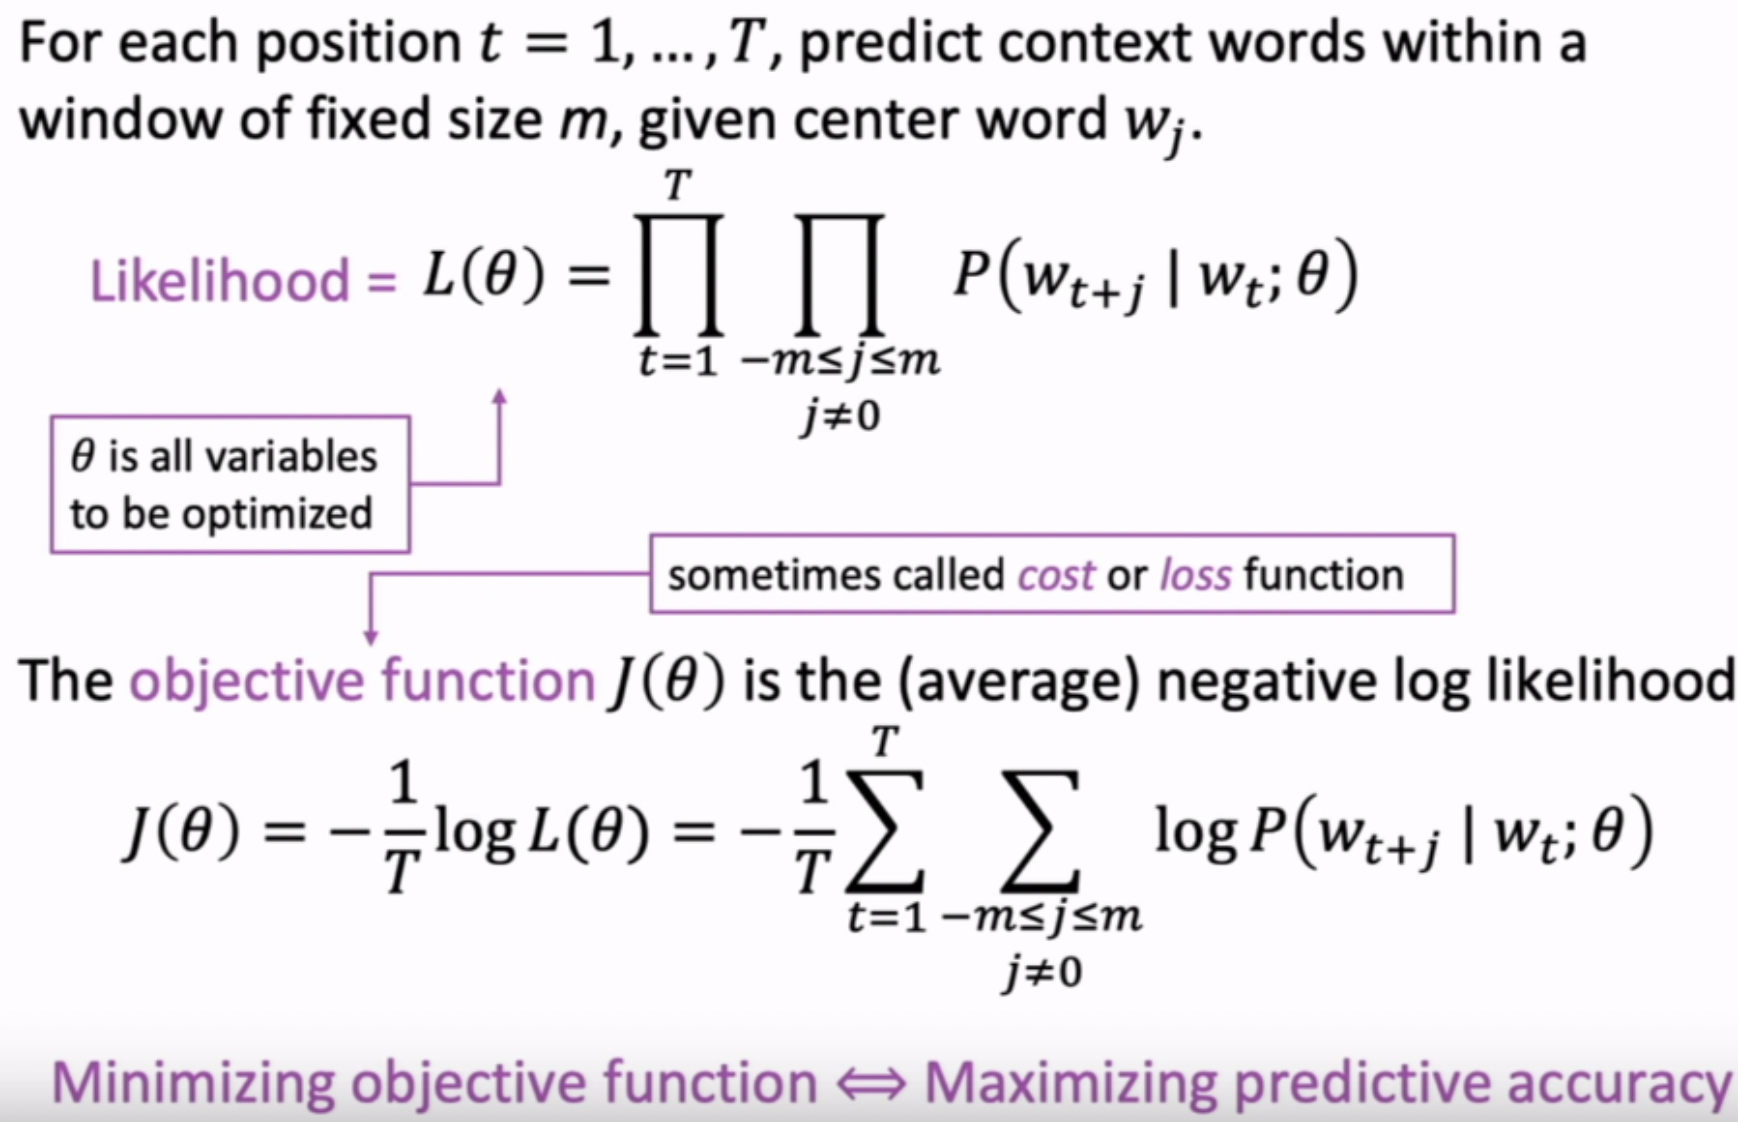

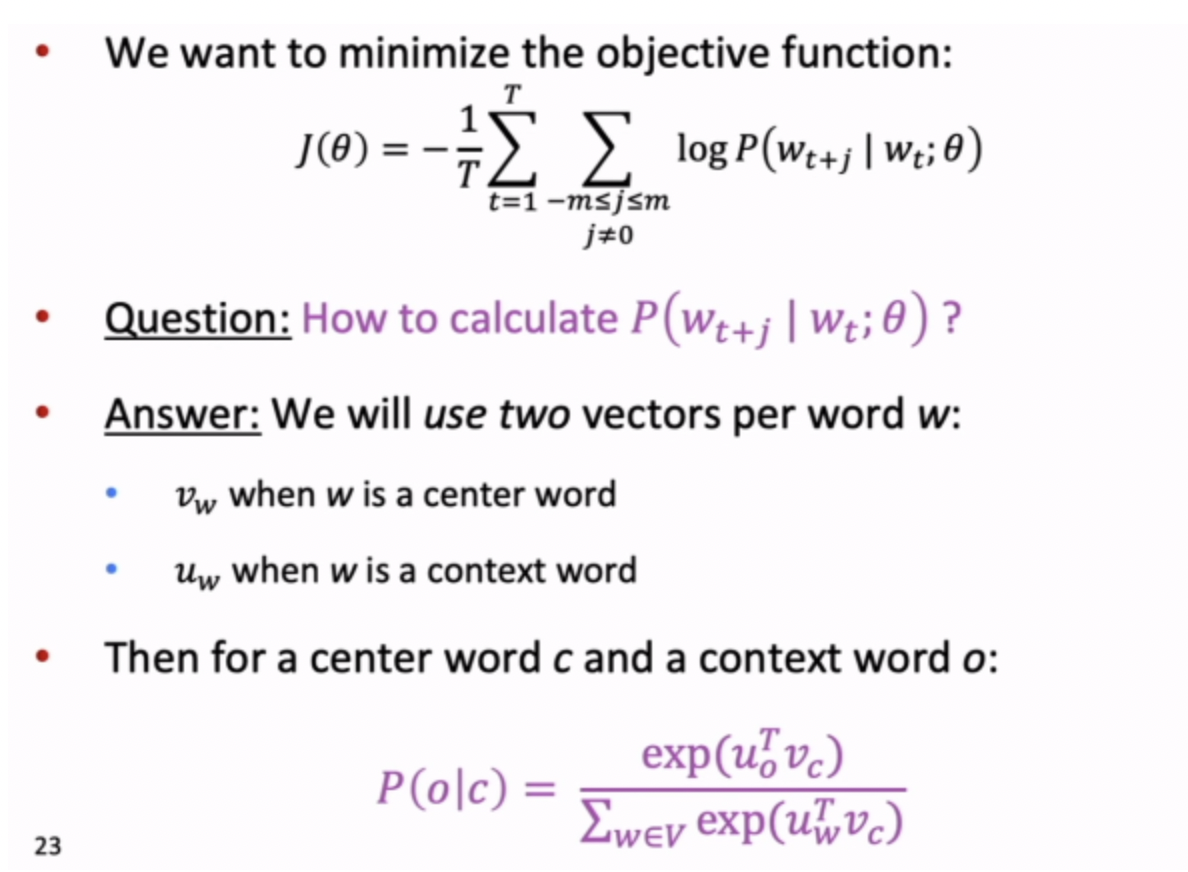

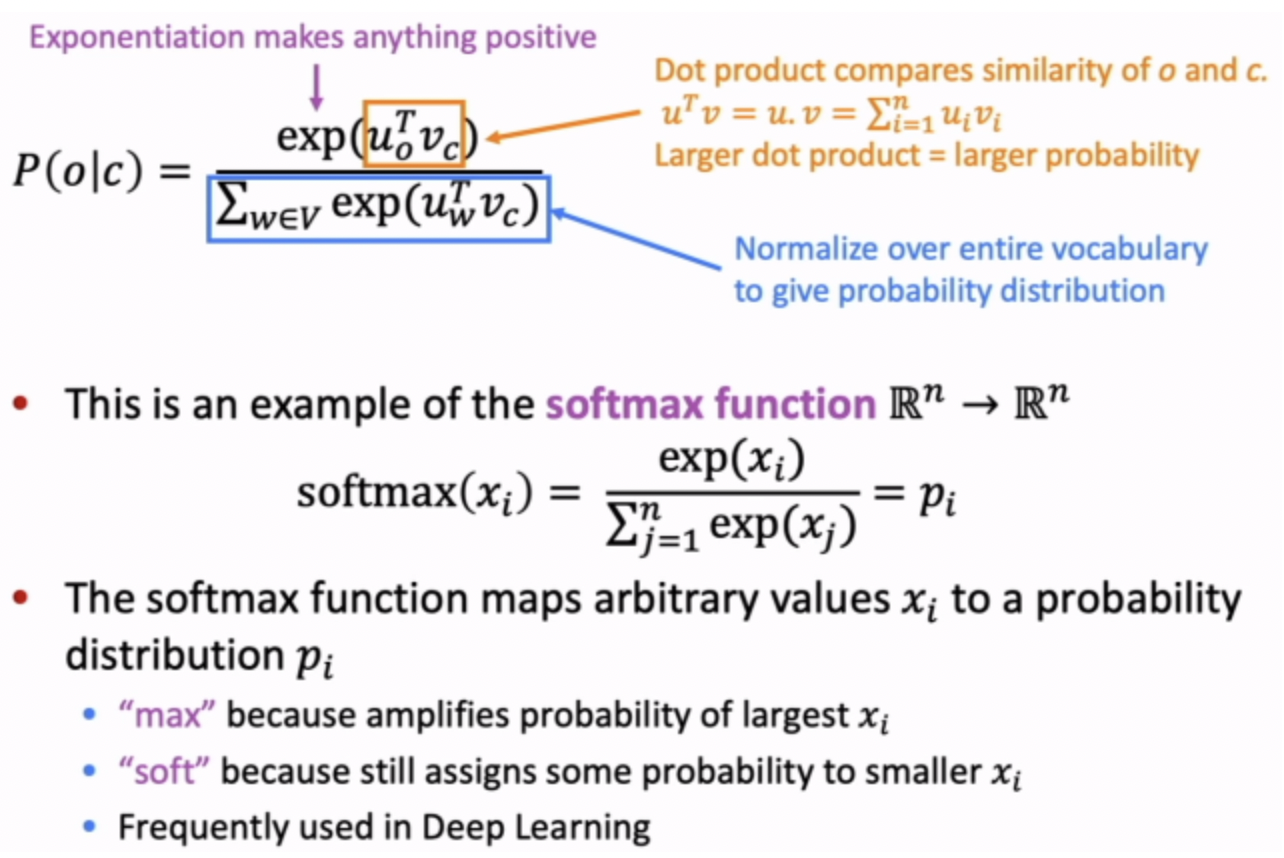

(source: https://ttommy.tech/2020/01/17/cs224-01/)

## 1.4. Looking at word vectors



**Training a model** by **optimizing parameters**

  To train a model, we adjust parameters to minimize a loss 

  E.g., below, for a simple convex function over two parameters

  Contour lines show levels of objective function

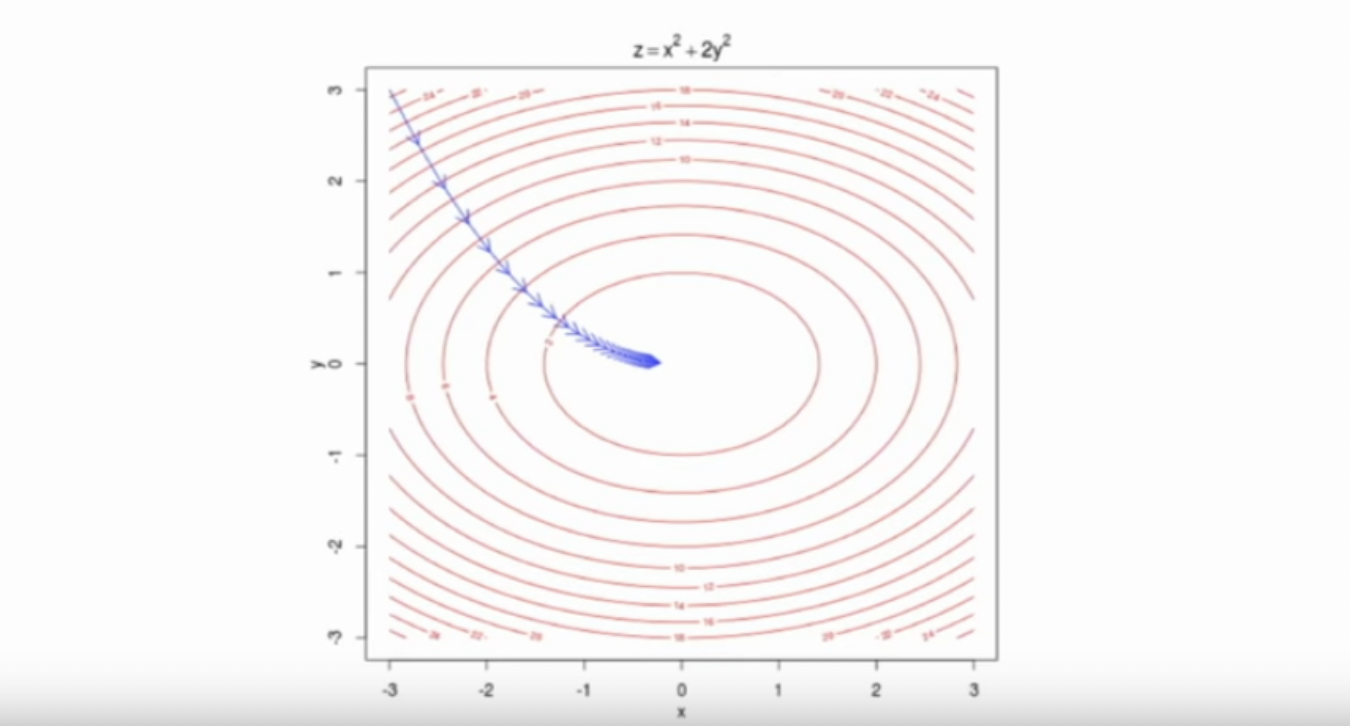

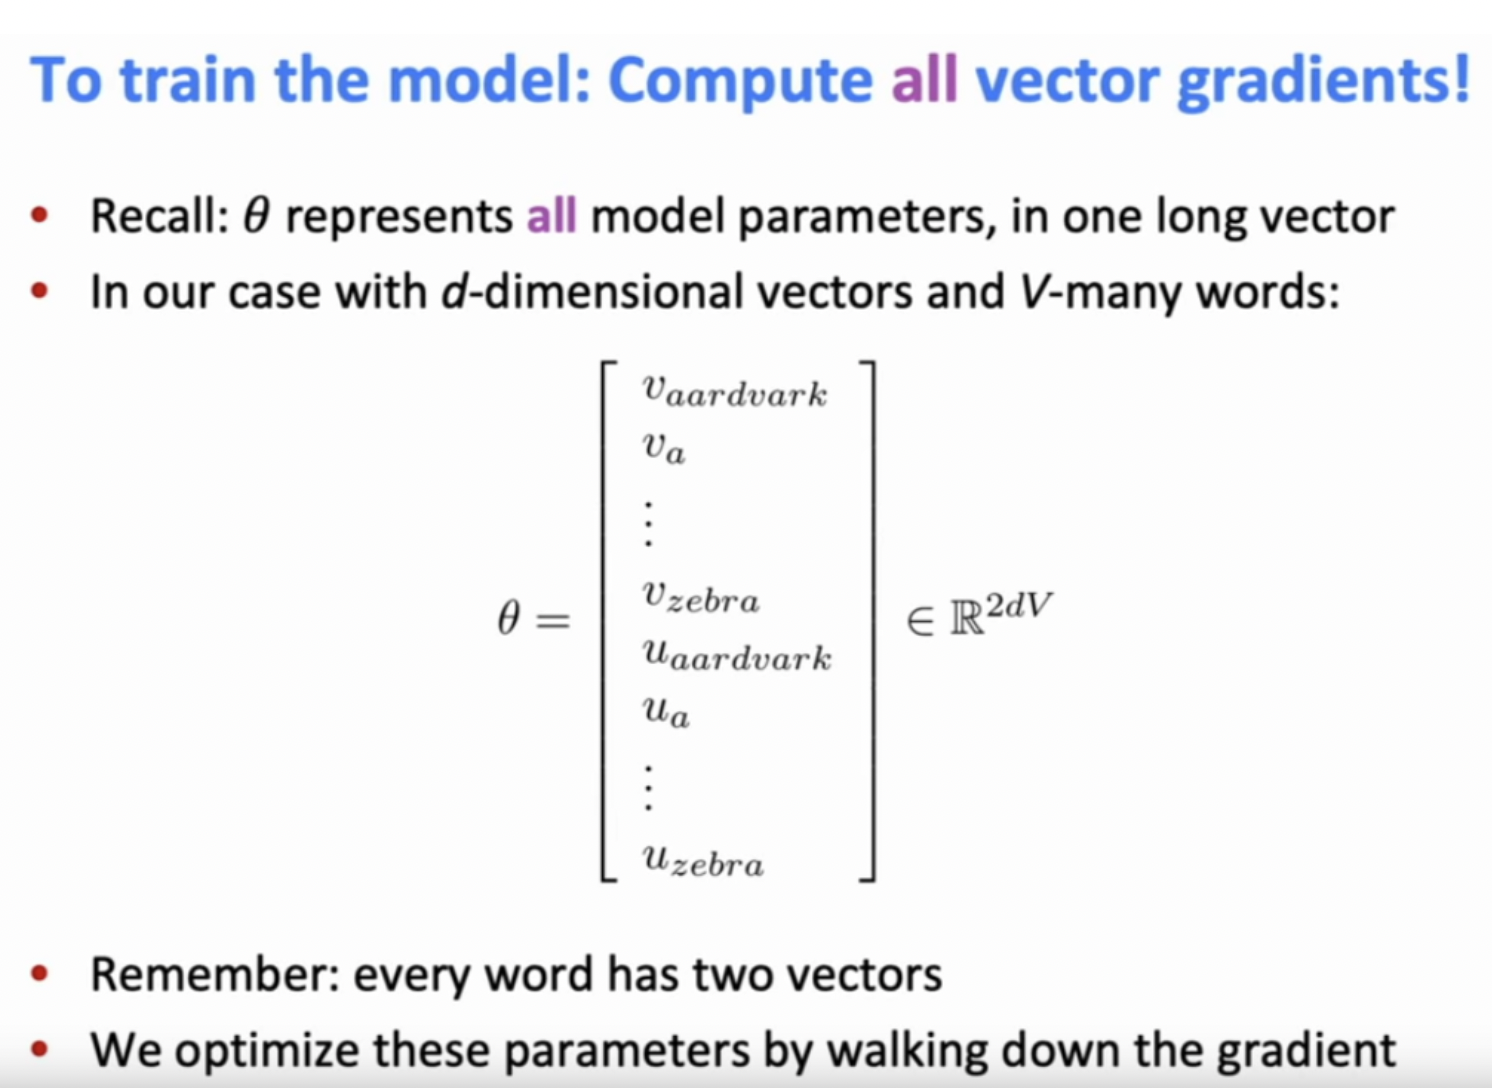

(source: https://sangminwoo.github.io/2019-08-28-cs224n-lec1/)